In [1]:

%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
reduce_size_by = 1.5
fig = plt.figure(figsize=(10/reduce_size_by,(15*5)/(2*reduce_size_by)))

In [2]:
import pickle
import pandas as pd

df_access = pickle.load(open("pd_access.3.p", "rb"))

In [3]:
df_error = DataFrame(pickle.load(open("df_error.p", "rb")))

In [7]:
def add_date_column(df):
    df['date'] = df['year'].map(str)+'-'+df['month'].map(str)+'-'+df['day'].map(str)
    return df

In [17]:
df_error = pd.DataFrame(df_error)
df_erro_grouped = df_error.groupby(["month", "year", "day"]).day.count().to_frame().rename(columns={'day':'er'})
df_erro_grouped = add_date_column(df_erro_grouped.reset_index())
ax = fig.add_subplot(5, 1, 1)
df_erro_grouped.plot(x="date", y="er", title="12 Days in 06-Aug-2017 to 09-Oct-2017  (28,481 Errors)", ax=ax)

In [18]:
df_rpf_06Aug2017_to_09Oct2017 = df_access.groupby(["year", "month", "day"]).day.count().to_frame().rename(columns={'day':'rpd'})
# request_count_every_minute_on_09Oct2017.to_csv("09Oct2017_rpm.csv")
df_rpf_06Aug2017_to_09Oct2017 = df_rpf_06Aug2017_to_09Oct2017.reset_index()
df_rpf_06Aug2017_to_09Oct2017['date'] = df_rpf_06Aug2017_to_09Oct2017['year'].map(str)+'-'+df_rpf_06Aug2017_to_09Oct2017['month'].map(str)+'-'+df_rpf_06Aug2017_to_09Oct2017['day'].map(str)
ax = fig.add_subplot(5, 1, 2)
df_rpf_06Aug2017_to_09Oct2017.plot(x="date", y="rpd", title="12 Days in 06-Aug-2017 to 09-Oct-2017 (4,031,407 Requests)", ax=ax)

In [19]:
df_rph_09102017 = df_access[(df_access.day==9) & (df_access.month==10) & (df_access.year==2017)].groupby(["hour"]).hour.count().to_frame().rename(columns={'hour':'rph'}).reset_index()
ax = fig.add_subplot(5, 1, 3)
df_rph_09102017.plot(x="hour", y="rph", title="09/Oct/2017 (2,52,211 requests)", ax=ax)

In [21]:
df_rpm_09Oct2017_02am = df_access[(df_access.day==9) & (df_access.month==10) & (df_access.year==2017) & (df_access.hour==2)].groupby(["minute"]).minute.count().to_frame().rename(columns={'minute':'rpm'}).reset_index()
ax = fig.add_subplot(5, 1, 4)
plot = df_rpm_09Oct2017_02am.reset_index().plot(x='minute', y='rpm', title="09/Oct/2017 02AM (17,387 Requests)", ax=ax)
plot

/home/manoj/.virtualenvs/delta/lib/python3.4/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [22]:
df_rps_09Oct2017_02H_34M = df_access[(df_access.day==9) & (df_access.month==10) & (df_access.year==2017) & (df_access.hour==2) & (df_access.minute==34)].groupby(["second"]).second.count().to_frame().rename(columns={'second':'rps'})
ax = fig.add_subplot(5, 1, 5)
df_rps_09Oct2017_02H_34M.reset_index().plot(x='second', y='rps', title="09-Oct-2017 02:34AM (624requests)", ax=ax)


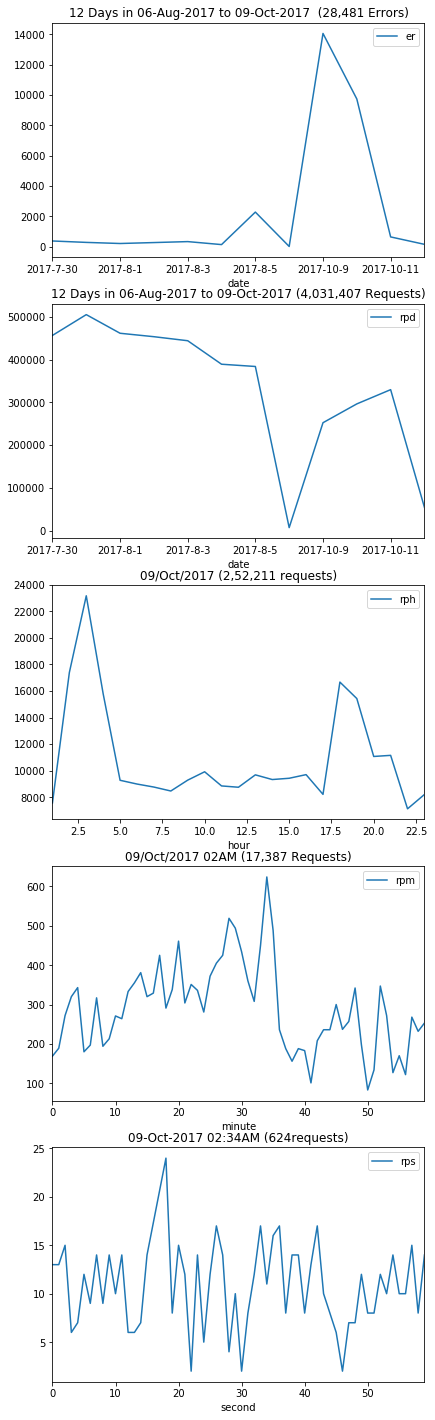

In [23]:
fig